In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
# jobid = 16636    # Random momenta with propagators at {0, 0, 0, 0}, {2, 2, 2, 2}
# jobid = 16677    # Random momenta with propagators at {1, 1, 1, 1}, {3, 3, 3, 3}
# jobid = 16872    # Diagonal of Brillouin zone with lots of configurations
jobid = 16954

out_dir = './analysis_output/job' + str(jobid)
Z, σ, mom_list, prop_mom_list, cfgnum = analysis.load_data(out_dir)

In [ ]:
# Z, σ = [], []
# for idx in range(len(prop_mom_list)):
#     Zidx, σidx = {}, {}
#     for p in mom_list:
#         pstring = analysis.plist_to_string(p)
#         Zidx[pstring] = Zprime[0][pstring][pstring]
#         σidx[pstring] = σprime[0][pstring][pstring]
#     Z.append(Zidx)
#     σ.append(σidx)

<IPython.core.display.Javascript object>


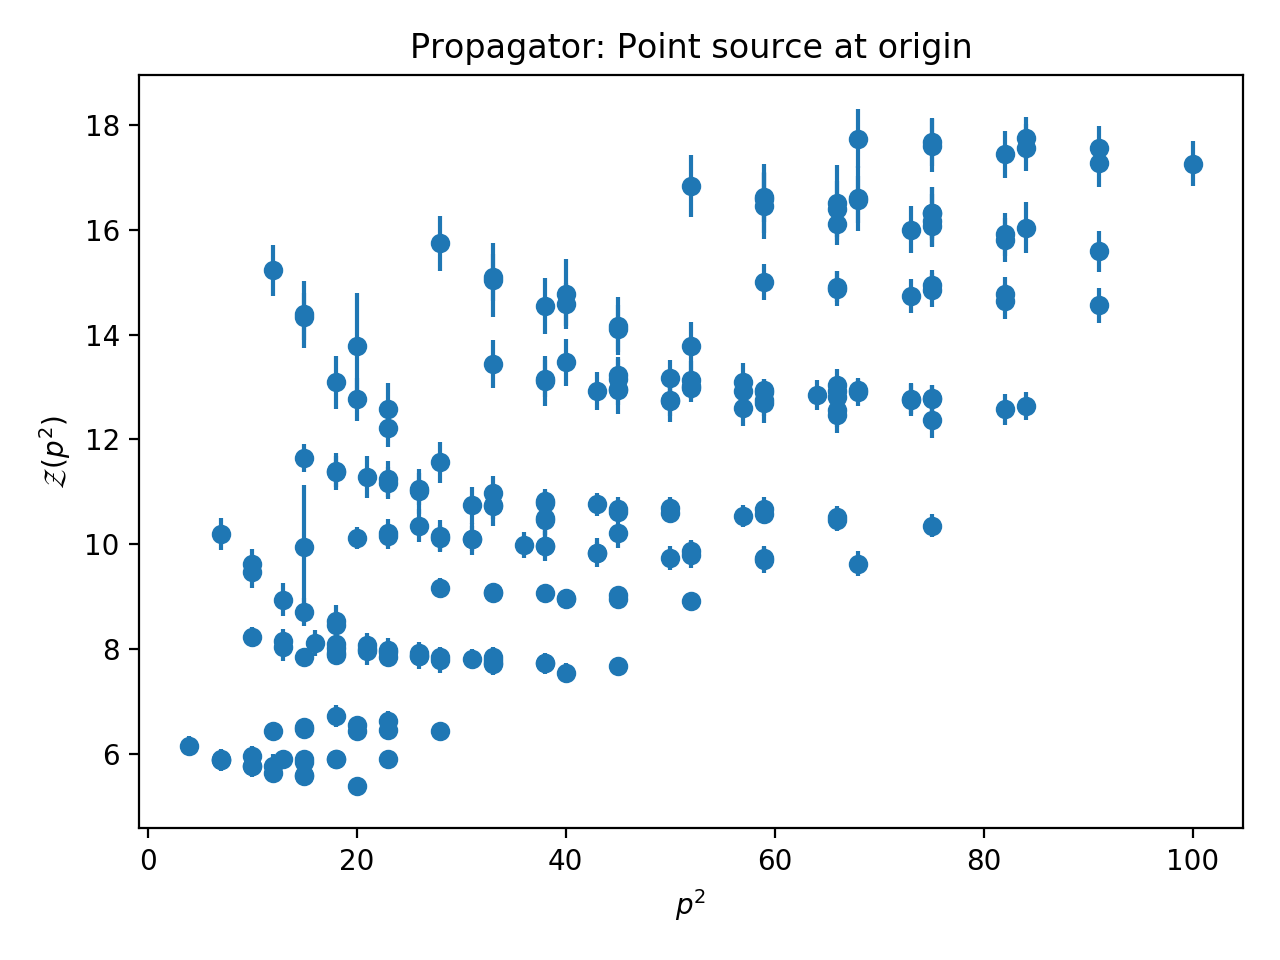

In [6]:
Z_list, σ_list = [], []
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
# f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 5))
f, ax = plt.subplots()
# ax = ax.flatten()
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
for idx in range(len(prop_mom_list)):
    Z_list.append(np.array([Z[idx][analysis.plist_to_string(p)] for p in mom_list]))
    σ_list.append(np.array([σ[idx][analysis.plist_to_string(p)] for p in mom_list]))
    #ax[idx].errorbar(p_squared, np.abs(Z_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o')
    #ax[idx].set_xlabel('$p^2$')
    #ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
    #ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
    ax.errorbar(p_squared, np.abs(Z_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o')
    ax.set_xlabel('$p^2$')
    ax.set_ylabel('$\mathcal{Z}(p^2)$')
    ax.set_title('Propagator: Point source at origin')
plt.tight_layout()
# plt.title('Renormalization of quark operator')
plt.show()

In [4]:
plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/16954/point_source_16954.pdf')

In [ ]:
num_subplots = (len(prop_mom_list) // 2 + 1, 2)
# num_subplots = (1, 2)
f1, ax1 = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
ax1 = ax1.flatten()
for idx, mom in enumerate(prop_mom_list):
    rsquared = [analysis.square(np.array(p) - np.array(mom)) for p in mom_list]
    ax1[idx].scatter(rsquared, σ_list[idx])
    #for i, p in enumerate(mom_list):
    #    ax1[idx].annotate(mom_list[i], (rsquared[i], σ_list[idx][i]))
    ax1[idx].set_xlabel('$|p - p_{prop}|^2$')
    ax1[idx].set_ylabel('Error')
    ax1[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
plt.tight_layout()
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/errors16636.pdf')

In [7]:
print(mom_list)

[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 [1 1 2 1]
 [1 1 2 2]
 [1 1 2 3]
 [1 1 3 1]
 [1 1 3 2]
 [1 1 3 3]
 [1 2 1 1]
 [1 2 1 2]
 [1 2 1 3]
 [1 2 2 1]
 [1 2 2 2]
 [1 2 2 3]
 [1 2 3 1]
 [1 2 3 2]
 [1 2 3 3]
 [1 3 1 1]
 [1 3 1 2]
 [1 3 1 3]
 [1 3 2 1]
 [1 3 2 2]
 [1 3 2 3]
 [1 3 3 1]
 [1 3 3 2]
 [1 3 3 3]
 [2 1 1 1]
 [2 1 1 2]
 [2 1 1 3]
 [2 1 2 1]
 [2 1 2 2]
 [2 1 2 3]
 [2 1 3 1]
 [2 1 3 2]
 [2 1 3 3]
 [2 2 1 1]
 [2 2 1 2]
 [2 2 1 3]
 [2 2 2 1]
 [2 2 2 2]
 [2 2 2 3]
 [2 2 2 4]
 [2 2 3 1]
 [2 2 3 2]
 [2 2 3 3]
 [2 2 3 4]
 [2 2 4 2]
 [2 2 4 3]
 [2 2 4 4]
 [2 3 1 1]
 [2 3 1 2]
 [2 3 1 3]
 [2 3 2 1]
 [2 3 2 2]
 [2 3 2 3]
 [2 3 2 4]
 [2 3 3 1]
 [2 3 3 2]
 [2 3 3 3]
 [2 3 3 4]
 [2 3 4 2]
 [2 3 4 3]
 [2 3 4 4]
 [2 4 2 2]
 [2 4 2 3]
 [2 4 2 4]
 [2 4 3 2]
 [2 4 3 3]
 [2 4 3 4]
 [2 4 4 2]
 [2 4 4 3]
 [2 4 4 4]
 [3 1 1 1]
 [3 1 1 2]
 [3 1 1 3]
 [3 1 2 1]
 [3 1 2 2]
 [3 1 2 3]
 [3 1 3 1]
 [3 1 3 2]
 [3 1 3 3]
 [3 2 1 1]
 [3 2 1 2]
 [3 2 1 3]
 [3 2 2 1]
 [3 2 2 2]
 [3 2 2 3]
 [3 2 2 4]
 [3 2 3 1]
 [3 2 3 2]

In [ ]:
# psub = subset of sink momenta to graph
# props_sub = subset of propagators to use (number of graphs to show)
# label = if True, will label each point with its momenta
def graph_subset(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx in range(len(props_sub)):
        Zsub = np.array([Z[idx][analysis.plist_to_string(p)] for p in psub])
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].errorbar(p_squared_sub, np.abs(Zsub), yerr = np.abs(σsub), fmt = 'o')
        if label:
            for i, p in enumerate(p_squared_sub):
                ax[idx].annotate(psub[i], (p, np.abs(Zsub[i])))
        ax[idx].set_xlabel('$p^2$')
        ax[idx].set_ylabel('$\mathcal{Z}(p^2)$')
        ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
    plt.tight_layout()
    plt.show()
def graph_subset_error(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx, mom in enumerate(props_sub):
        rsquaredsub = [analysis.square(np.array(p) - np.array(mom)) for p in psub]
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].scatter(rsquaredsub, σsub)
        if label:
            for i, r in enumerate(rsquaredsub):
                ax[idx].annotate(psub[i], (r, σsub[i]))
        ax[idx].set_xlabel('$|p - p_{prop}|^2$')
        ax[idx].set_ylabel('Error')
        ax[idx].set_title('Prop momentum = ' + str(prop_mom_list[idx]))
    plt.tight_layout()
    plt.show()

In [ ]:
psub = [p for p in mom_list if p[3] == 2]
# psub = [p for p in mom_list if p[0] == p[1] and p[1] == p[2]]
# psub = analysis.cylinder(mom_list, 2)
# psub = []
# for i in range(1, 4 + 1):
#     for j in range(2, 8 + 1, 2):
#         if j + 1 >= i and not (i == 8 and j == 10):
#             psub.append([i, i, i, j])
print(psub)

props_sub = prop_mom_list
# props_sub = prop_mom_list[:2]

graph_subset(psub, props_sub, label = True)

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/Plots/Z_sub.pdf')

In [ ]:
graph_subset_error(psub, props_sub, label = True)